<a href="https://colab.research.google.com/github/sujithh1110/AIML11/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,parser='auto')


In [11]:
type(car_data)

pandas.core.frame.DataFrame

In [6]:
car_data.details['version']



'2'

In [7]:
# Data description

print(car_data.DESCR)


**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [8]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
# Getting the whole dataframe

car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [12]:
type(car_data)

pandas.core.frame.DataFrame

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 1555 
The size of testing data is: 173


In [14]:
# Checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,2
top,med,low,2,2,med,low,P
freq,402,392,393,521,522,528,1097


In [15]:
# Checking missing values
train_data.isnull().sum()



,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [16]:
train_data['buying'].value_counts()

,count
buying,
med,402
vhigh,387
high,385
low,381


<Axes: xlabel='buying', ylabel='count'>

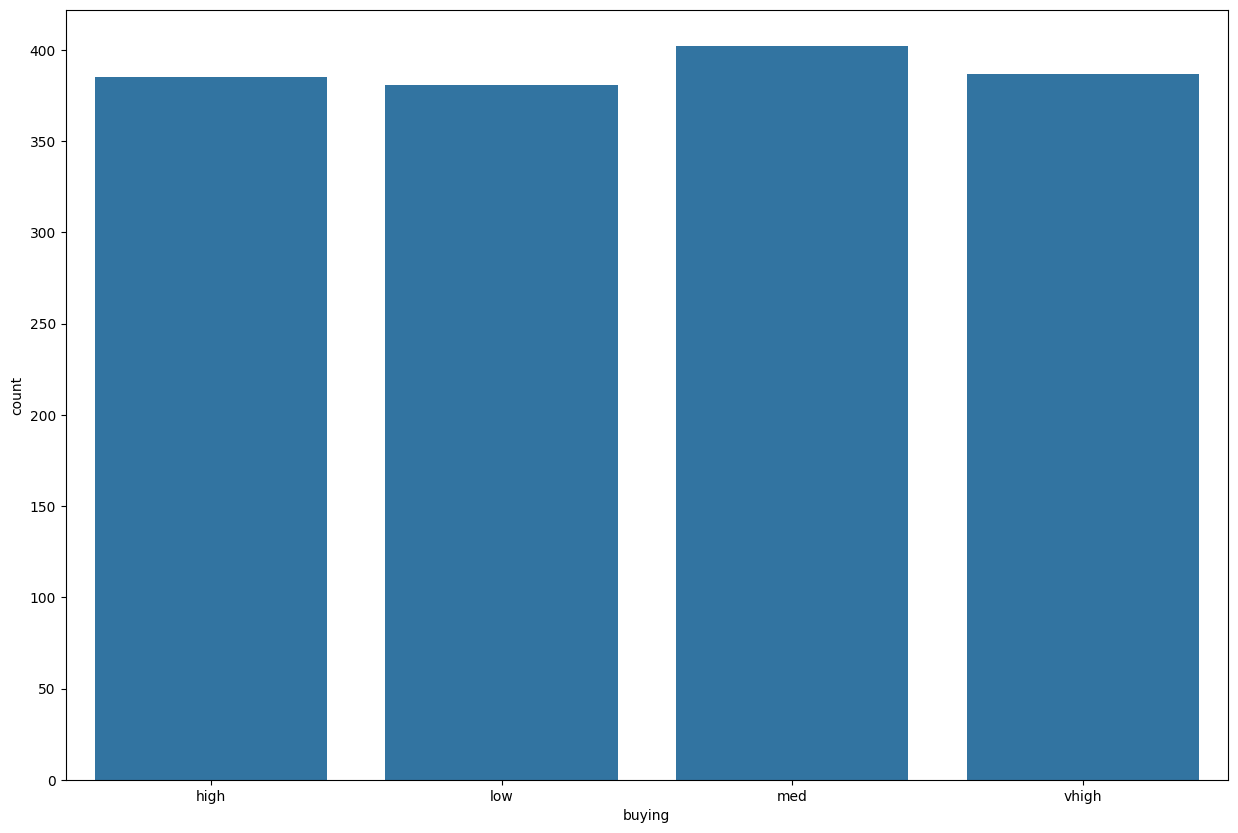

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')


<Axes: xlabel='buying', ylabel='count'>

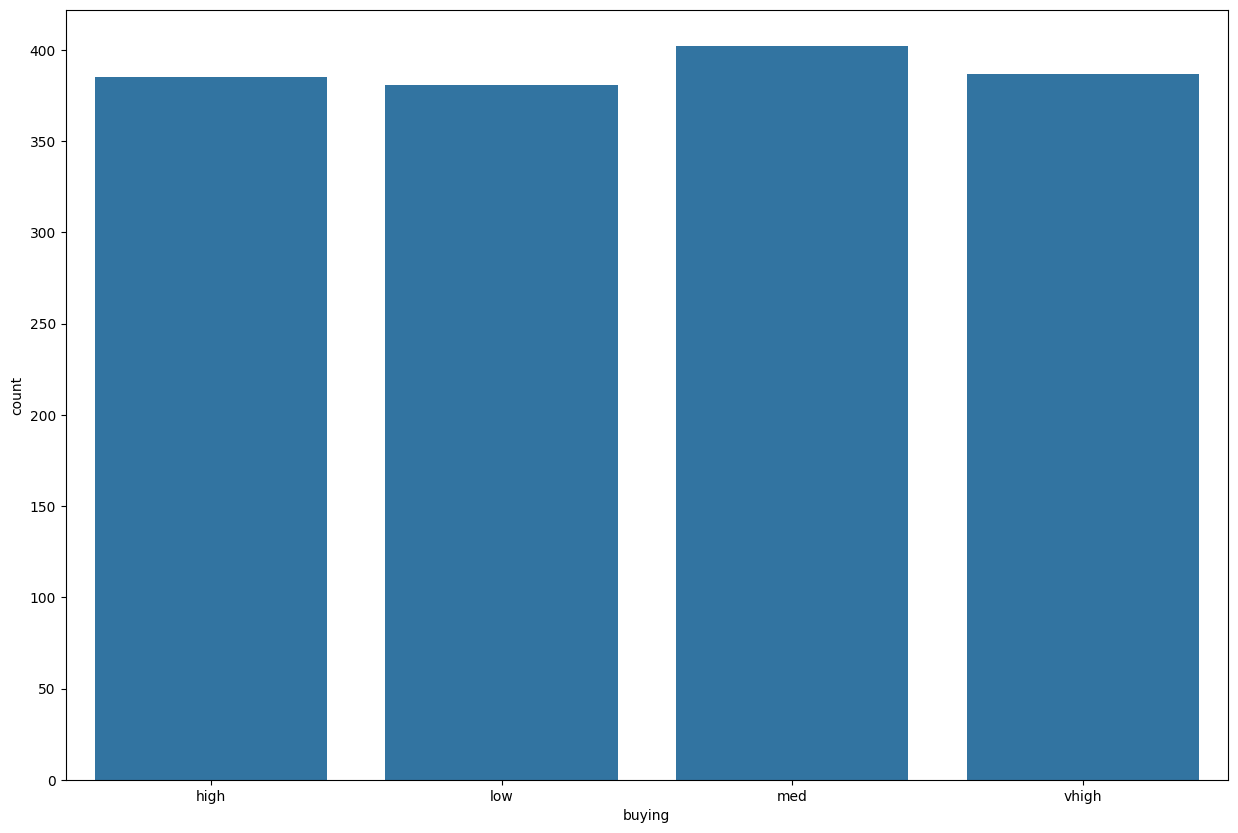

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')


<Axes: xlabel='buying', ylabel='count'>

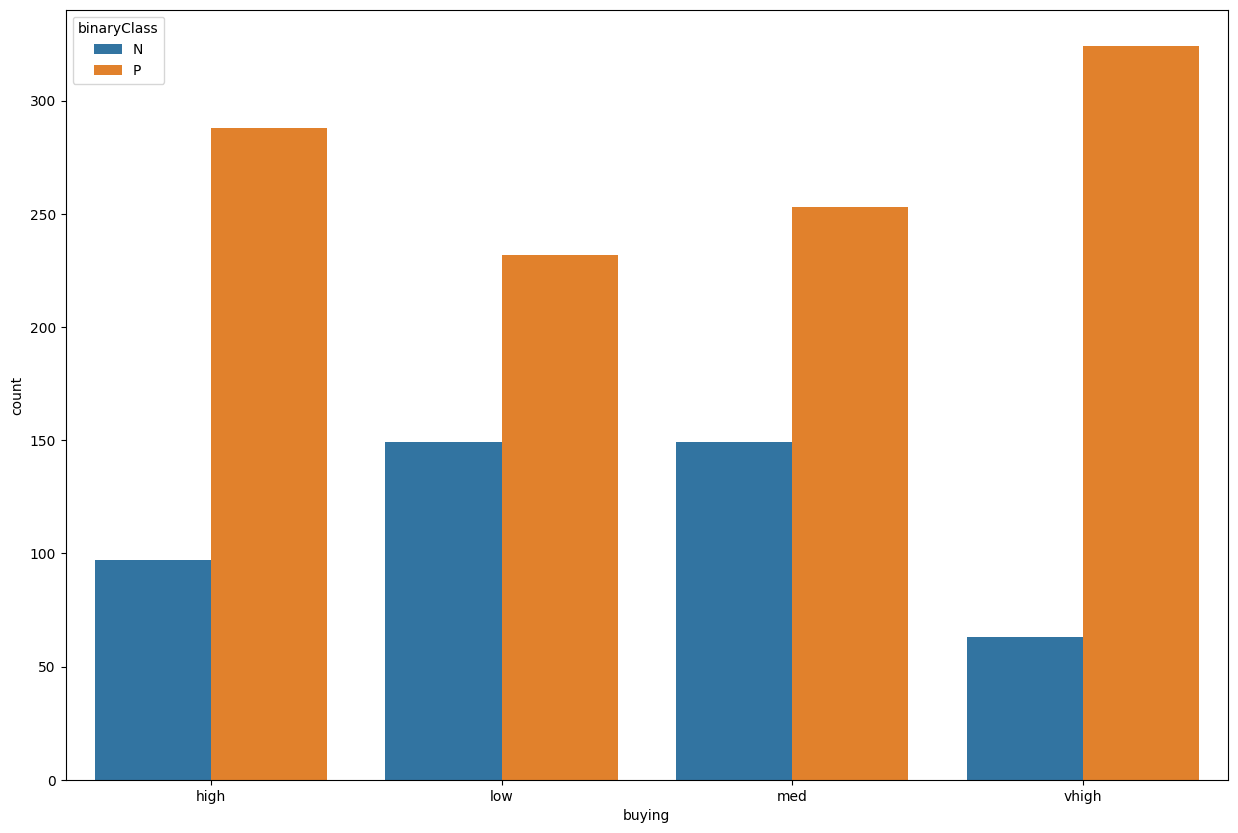

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')


In [20]:
train_data['maint'].value_counts()

,count
maint,
low,392
med,390
high,387
vhigh,386


<Axes: xlabel='maint', ylabel='count'>

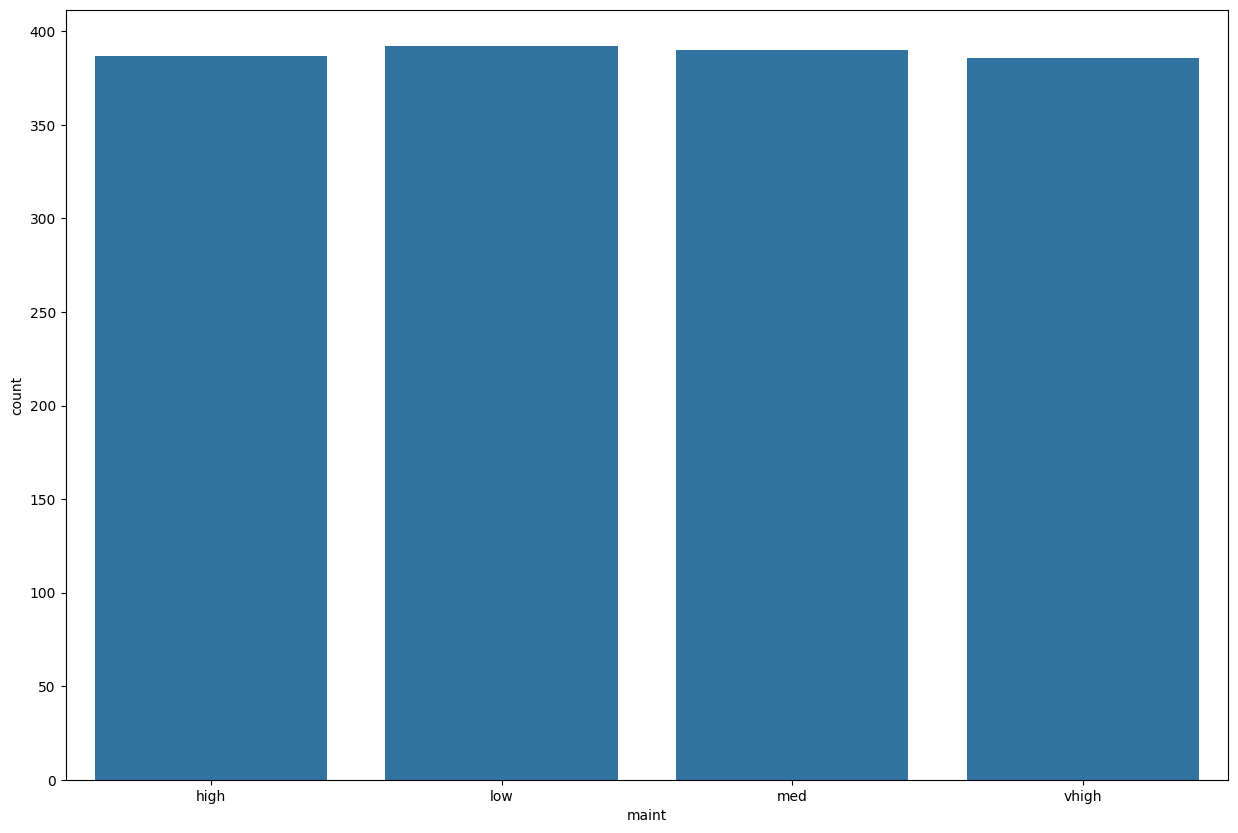

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

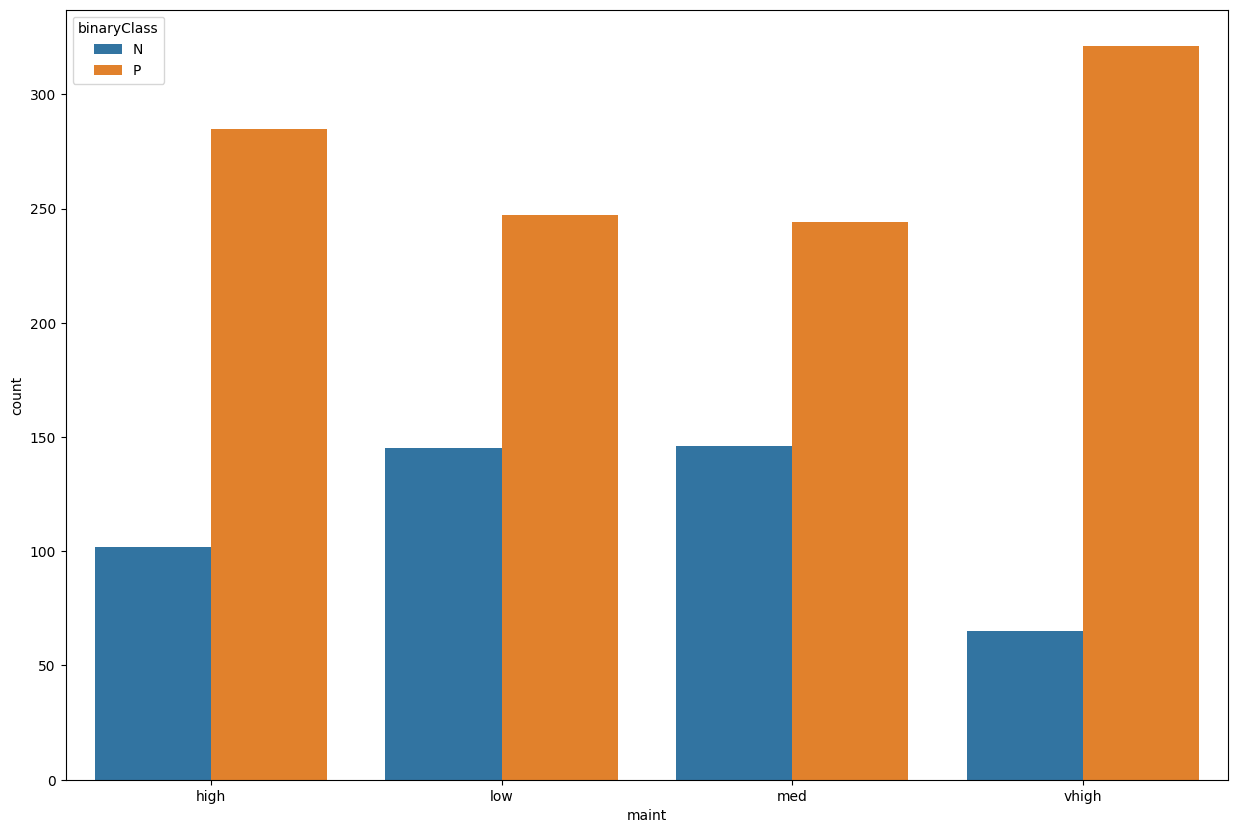

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')


In [23]:
train_data['doors'].value_counts()


,count
doors,
2,393
4,393
5more,389
3,380


<Axes: xlabel='doors', ylabel='count'>

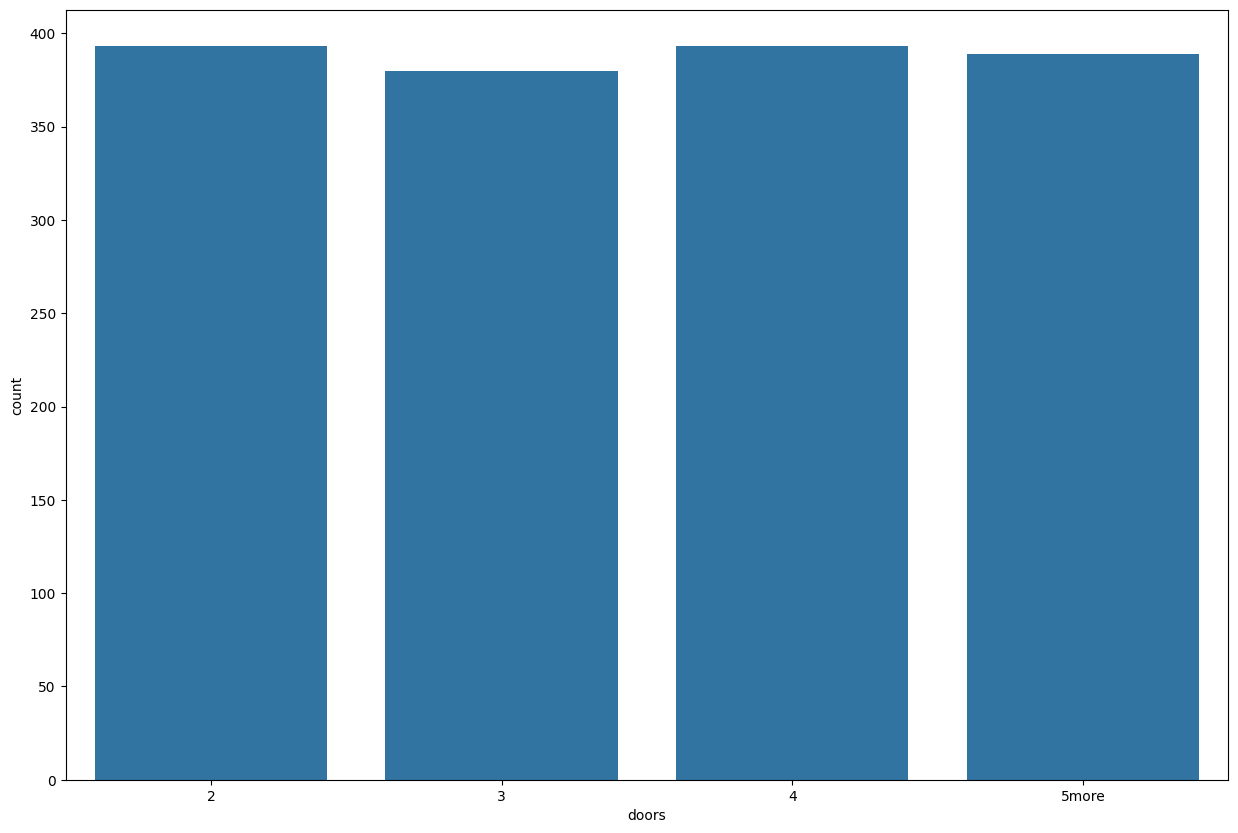

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

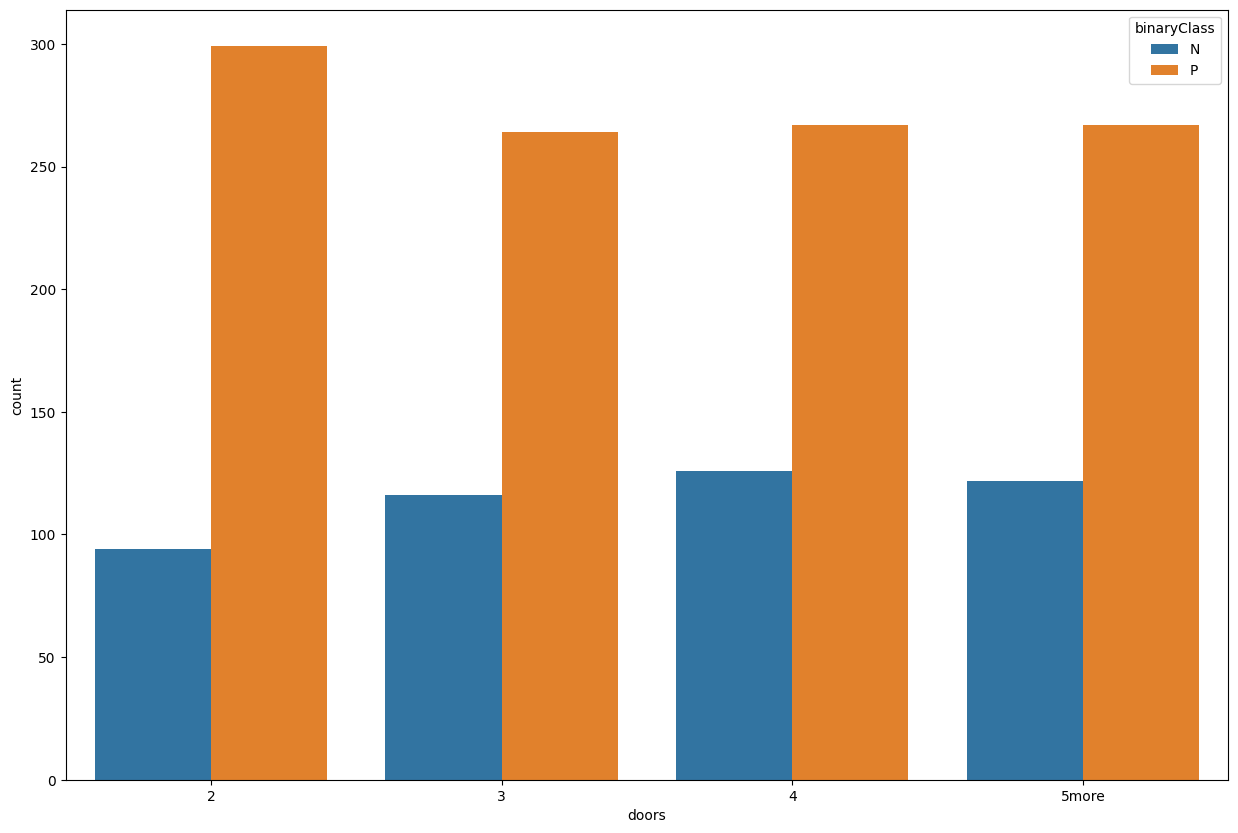

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')


In [26]:
train_data['persons'].value_counts()


,count
persons,
2,521
more,521
4,513


<Axes: xlabel='persons', ylabel='count'>

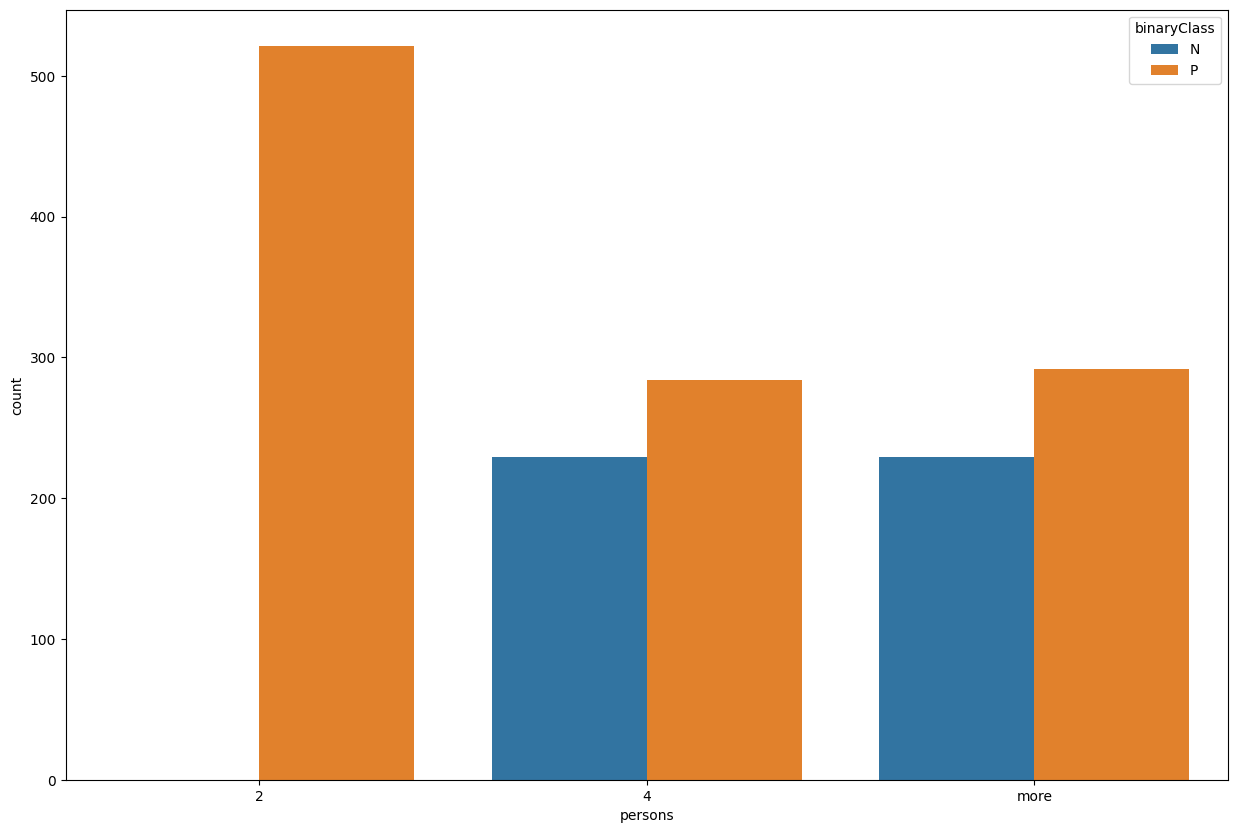

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [28]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
med,522
small,517
big,516


<Axes: xlabel='lug_boot', ylabel='count'>

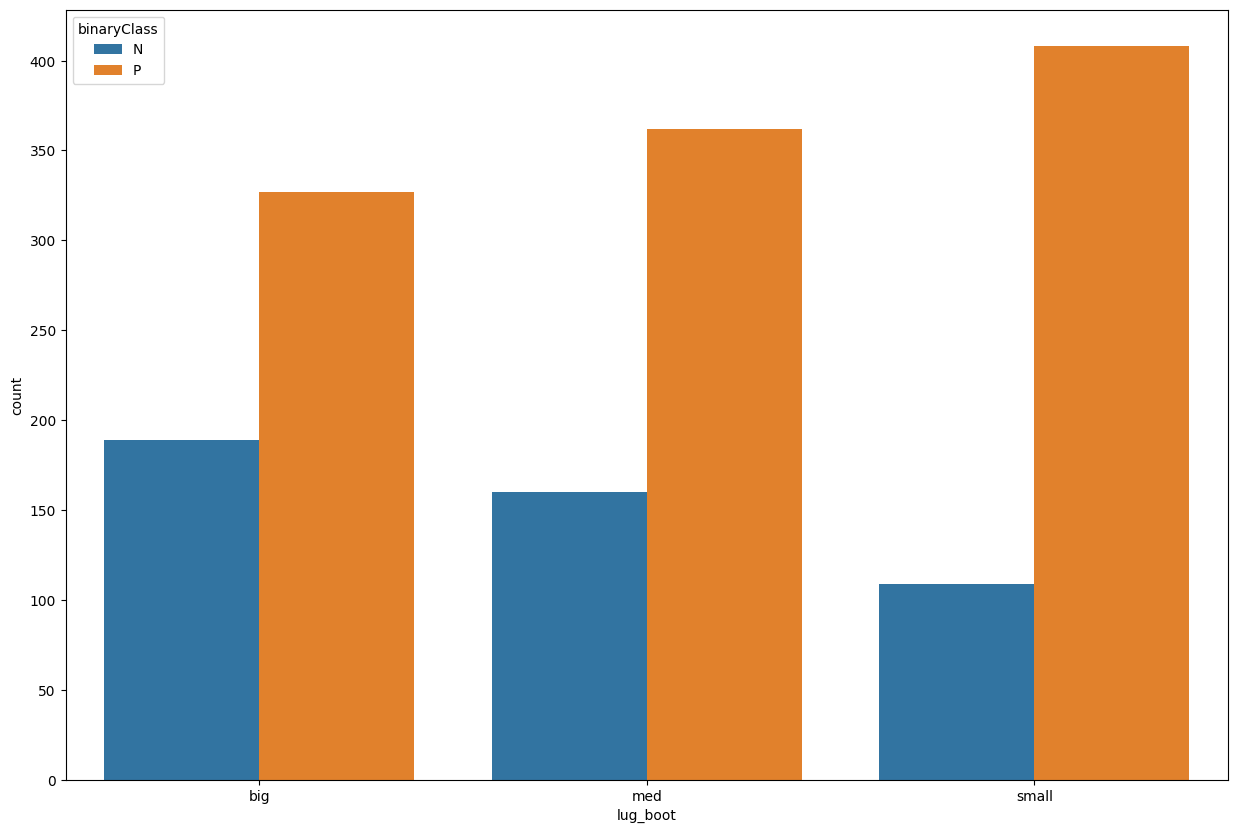

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [30]:
train_data['safety'].value_counts()

,count
safety,
low,528
high,514
med,513


<Axes: xlabel='safety', ylabel='count'>

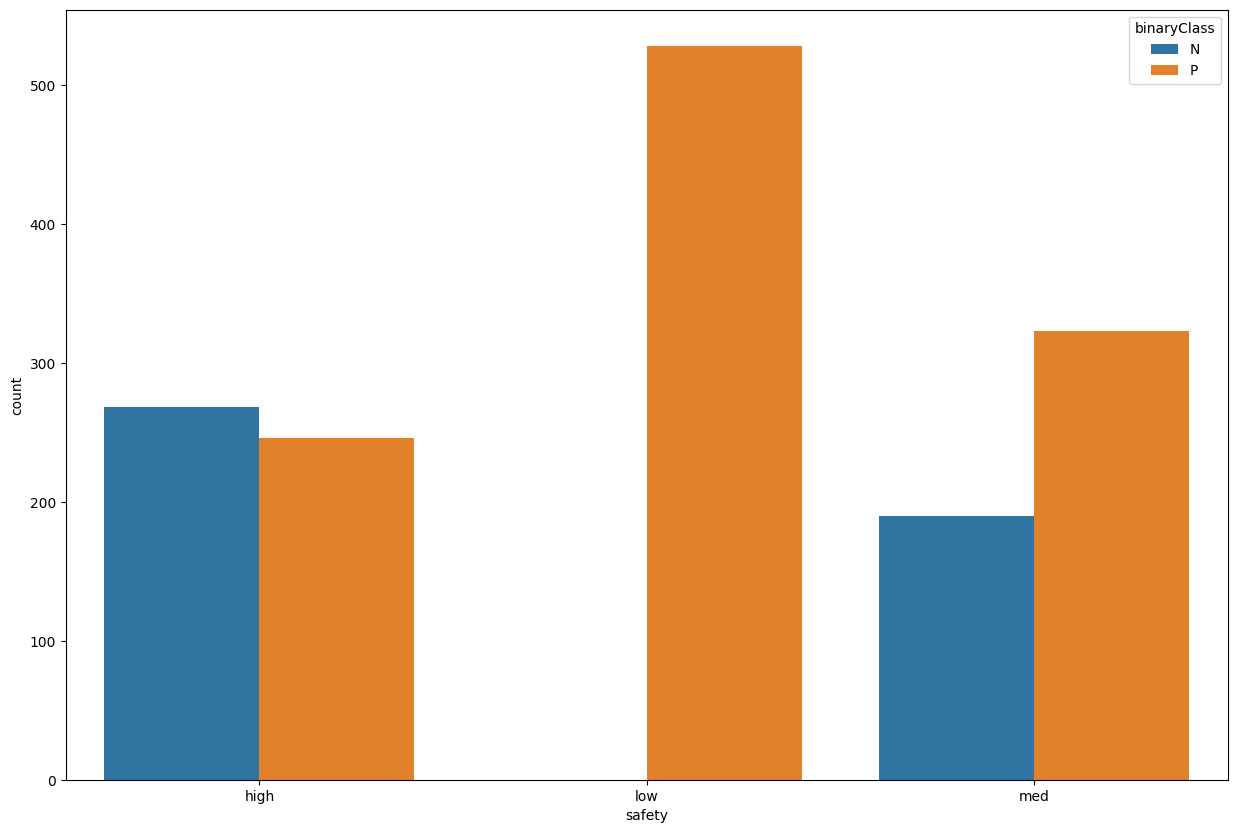

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [32]:
train_data['binaryClass'].value_counts()


,count
binaryClass,
P,1097
N,458


<Axes: xlabel='binaryClass', ylabel='count'>

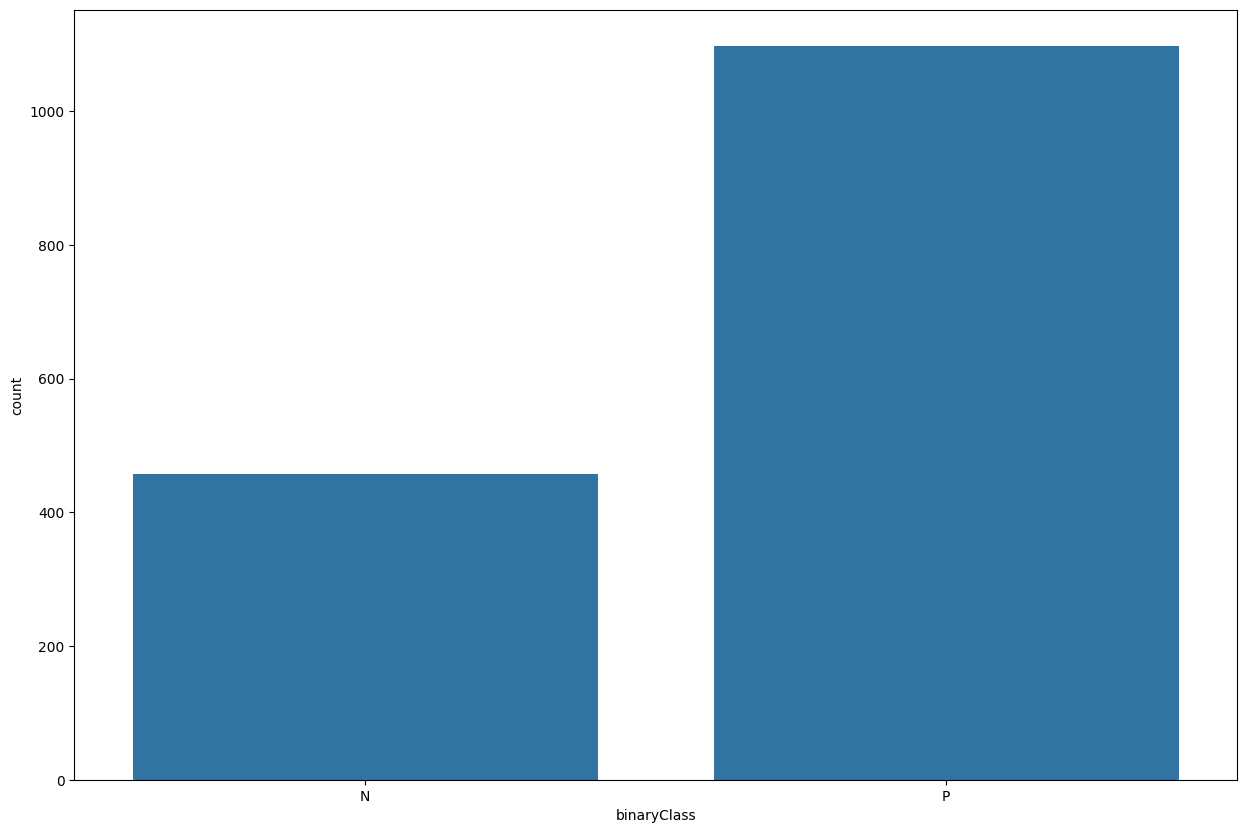

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

In [35]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [36]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())

])

car_train_prepared = pipe.fit_transform(car_train)

In [37]:
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [39]:
# if you run this, it will be error.
# SKlearn tree implementation doesn't support categorical features

#from sklearn.tree import DecisionTreeClassifier

#tree_clf = DecisionTreeClassifier()

#tree_clf.fit(car_train, car_labels)


In [40]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
    Take the input data, model and labels and return accuracy

    """

    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)

    return acc

In [41]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix

    """

    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [42]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix

    """

    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)

    return report


In [43]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix

    """

    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [44]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

In [45]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)


array([[ 458,    0],
       [   0, 1097]])

In [46]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555



In [47]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [48]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [50]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [51]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [52]:
tree_best = grid_search.best_estimator_

In [53]:
car_data.columns


Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

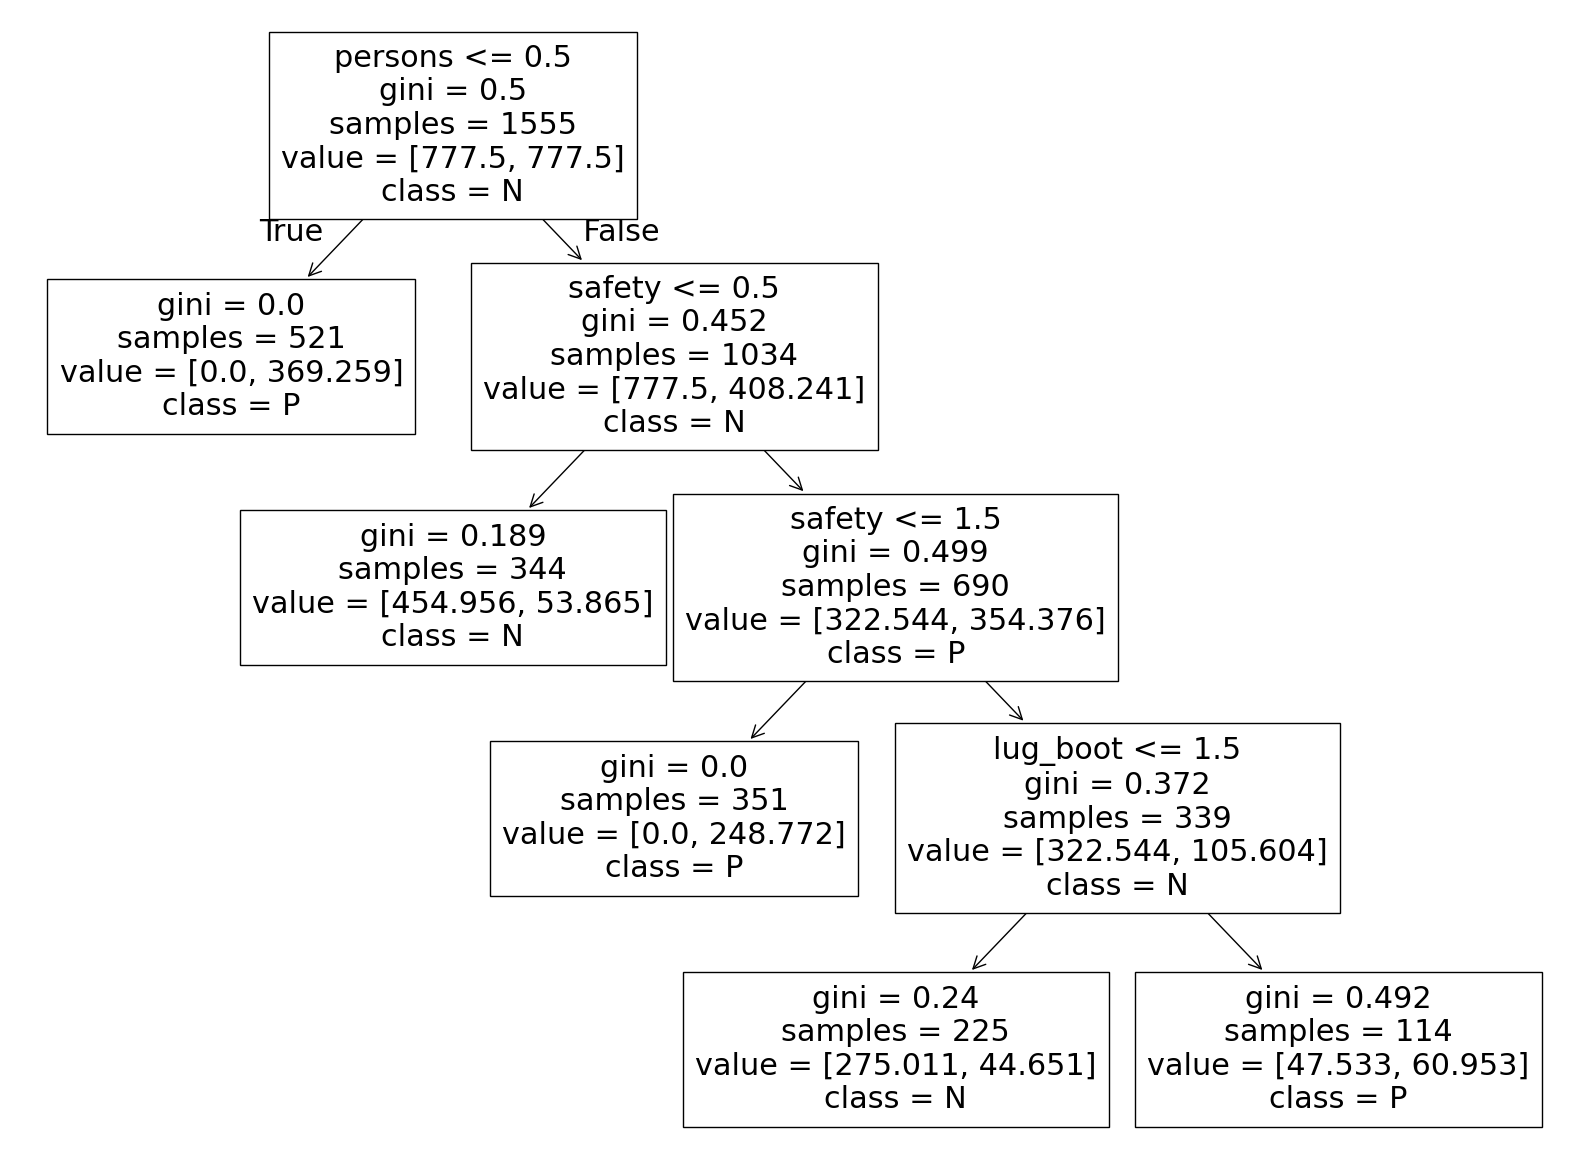

In [54]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);


In [55]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)


0.8926045016077171

In [56]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)


array([[430,  28],
       [139, 958]])

In [57]:

class_report(car_train_prepared, tree_best, car_labels_prepared)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       458
           1       0.97      0.87      0.92      1097

    accuracy                           0.89      1555
   macro avg       0.86      0.91      0.88      1555
weighted avg       0.91      0.89      0.90      1555



In [58]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']



In [59]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)


In [60]:
# Handle labels too

car_test_labels_prepared = label_enc.transform(car_test_labels)


In [61]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8554913294797688

In [62]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

array([[53,  7],
       [18, 95]])

In [63]:
class_report(car_test_prepared, tree_best, car_test_labels_prepared)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        60
           1       0.93      0.84      0.88       113

    accuracy                           0.86       173
   macro avg       0.84      0.86      0.85       173
weighted avg       0.87      0.86      0.86       173

